<a href="https://colab.research.google.com/github/haickalakbar/Case-Study-03-Data-Mining-UIN-Ganjil-2022-Kelompok-5/blob/main/Case_Study_03_Data_Mining_UIN_Ganjil_2022_Kelompok_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>Market Basket Analysis Toko AlfaIndo Cabang UIN Ciputat</center></h1>

AlfaIndo adalah sebuah toko waralaba yang memiliki beberapa cabang di kota-kota besar di Indonesia seperti Jakarta, Depok, Tangerang, Surabaya, dan Medan. Pasca masa pandemi Toko AlfaIndo cabang UIN Ciputat mengalami **penurunan laba yang signifikan**. Berikut akan ditemukan solusi tentang apa yang harus dilakukan oleh Toko AlfaIndo untuk bangkit dari keterpurukannya.

# Import Library

In [ ]:
# Warning install "mlxtend" module first. Jalankan cell ini Hanya jika menggunakan Google Colaboratory:
# Jika menggunakan Jupyter notebook secara lokal (e.g. Anaconda/WinPython) silahkan install lewat terminal (e.g. command prompt)
try:
    import google.colab as gc_
    print("Running the code in Google Colab.", gc_) #IN_COLAB = True
    print("Installing required Module, please wait ... ")
    !pip install mlxtend 
except:
    print("Running the code locally, make sure to install required modules.")#IN_COLAB = False

Running the code in Google Colab. <module 'google.colab' from '/usr/local/lib/python3.7/dist-packages/google/colab/__init__.py'>
Installing required Module, please wait ... 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from itertools import combinations
from collections import Counter
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import seaborn as sns

%matplotlib inline
plt.style.use('bmh'); sns.set()

# Load Data

In [ ]:
# Running in Google Colab
!mkdir data
!wget -P data/ https://raw.githubusercontent.com/haickalakbar/Case-Study-03-Data-Mining-UIN-Ganjil-2022-Kelompok-5/main/ARMBA.csv

mkdir: cannot create directory ‘data’: File exists
--2022-10-26 03:52:01--  https://raw.githubusercontent.com/haickalakbar/Case-Study-03-Data-Mining-UIN-Ganjil-2022-Kelompok-5/main/ARMBA.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1756 (1.7K) [text/plain]
Saving to: ‘data/ARMBA.csv.2’

ARMBA.csv.2         100%[===================>]   1.71K  --.-KB/s    in 0s      

2022-10-26 03:52:01 (26.5 MB/s) - ‘data/ARMBA.csv.2’ saved [1756/1756]



In [ ]:
df = pd.read_csv("data/ARMBA.csv")
df

,ID Transaksi,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
0,1.0,07/01/2022 00:00:00,Mr. A,1,Roti,Sri Roti,2
1,NaN,NaN,NaN,2,Air Minum,Aquos,1
2,NaN,NaN,NaN,11,Mie Instan,Indomi,2
3,NaN,NaN,NaN,12,Mie Instan,Mi Sedap,1
4,2.0,07/01/2022 00:00:00,Mr. B,2,Air Minum,Aquos,1
5,NaN,NaN,NaN,6,Snack,Chiki,2
6,NaN,NaN,NaN,3,Roti,Prambanan,1
7,NaN,NaN,NaN,5,Shampoo,Clean,1
8,3.0,07/02/2022 00:00:00,Mr. C,4,Sabun,Lifboy,1
9,NaN,NaN,NaN,5,Shampoo,Clean,1


kami melakukan import data berbentuk csv berupa tabel yang berisikan variabel:
- ID Transaksi : kode unik setiap aktivitas transaksi
- Tanggal : Waktu Aktivitas Transaksi masing masing pelanggan
- Konsumen : Nama Pelanggan yang melakukan transaksi belanja
- ID produk : 

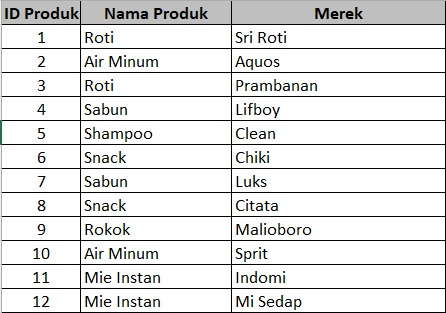
- Nama Produk dan Merek : detail produk dan merek yang di beli pelanggan setiap transaksi
- Jumlah : kuantitas barang yang di beli setiap kali transaksi

# Preprocessing

## Mengatasi Missing Value

Kami mengatasi missing value dengan menggunakan forward fill yaitu mengisi missing value dengan value pada data sebelumnya

In [ ]:
# Mengatasi MV
df.ffill(inplace = True)
df

,ID Transaksi,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
0,1.0,07/01/2022 00:00:00,Mr. A,1,Roti,Sri Roti,2
1,1.0,07/01/2022 00:00:00,Mr. A,2,Air Minum,Aquos,1
2,1.0,07/01/2022 00:00:00,Mr. A,11,Mie Instan,Indomi,2
3,1.0,07/01/2022 00:00:00,Mr. A,12,Mie Instan,Mi Sedap,1
4,2.0,07/01/2022 00:00:00,Mr. B,2,Air Minum,Aquos,1
5,2.0,07/01/2022 00:00:00,Mr. B,6,Snack,Chiki,2
6,2.0,07/01/2022 00:00:00,Mr. B,3,Roti,Prambanan,1
7,2.0,07/01/2022 00:00:00,Mr. B,5,Shampoo,Clean,1
8,3.0,07/02/2022 00:00:00,Mr. C,4,Sabun,Lifboy,1
9,3.0,07/02/2022 00:00:00,Mr. C,5,Shampoo,Clean,1


In [ ]:
df.isnull().sum()

ID Transaksi    0
Tanggal         0
Konsumen        0
ID Produk       0
Nama Produk     0
Merek           0
Jumlah          0
dtype: int64

## Mengganti Nama Variabel

Mengganti nama variabel di lakukan untuk meminimalisir human error saat case study ini

In [ ]:
df.rename(columns = {'ID Transaksi':'IDTransaksi'}, inplace = True)
df.rename(columns = {'ID Produk':'IDProduk'}, inplace = True)
df.rename(columns = {'Nama Produk':'NamaProduk'}, inplace = True)
df

,IDTransaksi,Tanggal,Konsumen,IDProduk,NamaProduk,Merek,Jumlah
0,1.0,07/01/2022 00:00:00,Mr. A,1,Roti,Sri Roti,2
1,1.0,07/01/2022 00:00:00,Mr. A,2,Air Minum,Aquos,1
2,1.0,07/01/2022 00:00:00,Mr. A,11,Mie Instan,Indomi,2
3,1.0,07/01/2022 00:00:00,Mr. A,12,Mie Instan,Mi Sedap,1
4,2.0,07/01/2022 00:00:00,Mr. B,2,Air Minum,Aquos,1
5,2.0,07/01/2022 00:00:00,Mr. B,6,Snack,Chiki,2
6,2.0,07/01/2022 00:00:00,Mr. B,3,Roti,Prambanan,1
7,2.0,07/01/2022 00:00:00,Mr. B,5,Shampoo,Clean,1
8,3.0,07/02/2022 00:00:00,Mr. C,4,Sabun,Lifboy,1
9,3.0,07/02/2022 00:00:00,Mr. C,5,Shampoo,Clean,1


## Mengubah Tipe Data

Kami mengubah variabel :
- IDTransaksi dan IDProduk dari tipe data float64 dan int64 menjadi str
- Tanggal dari object menjadi date time
- Merek dari object menjadi category
- Nama Produk dari object menjadi category

In [ ]:
# Tipe Datanya : DataFrame (df)
print(type(df))
# Ukuran Data
N, P = df.shape
'baris = ', N, ', Kolom = ', P

# tipe data per kolom
df.dtypes

<class 'pandas.core.frame.DataFrame'>


IDTransaksi    float64
Tanggal         object
Konsumen        object
IDProduk         int64
NamaProduk      object
Merek           object
Jumlah           int64
dtype: object

In [ ]:
#Mengubah tipe data
df['IDTransaksi'] = df['IDTransaksi'].astype('str')
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df['Merek'] = df['Merek'].astype('category')
df['IDProduk'] = df['IDProduk'].astype('str')
df['NamaProduk'] = df['NamaProduk'].astype('category')
df['Konsumen'] = df['Konsumen'].astype('category')

In [ ]:
df.dtypes
df

,IDTransaksi,Tanggal,Konsumen,IDProduk,NamaProduk,Merek,Jumlah
0,1.0,2022-07-01,Mr. A,1,Roti,Sri Roti,2
1,1.0,2022-07-01,Mr. A,2,Air Minum,Aquos,1
2,1.0,2022-07-01,Mr. A,11,Mie Instan,Indomi,2
3,1.0,2022-07-01,Mr. A,12,Mie Instan,Mi Sedap,1
4,2.0,2022-07-01,Mr. B,2,Air Minum,Aquos,1
5,2.0,2022-07-01,Mr. B,6,Snack,Chiki,2
6,2.0,2022-07-01,Mr. B,3,Roti,Prambanan,1
7,2.0,2022-07-01,Mr. B,5,Shampoo,Clean,1
8,3.0,2022-07-02,Mr. C,4,Sabun,Lifboy,1
9,3.0,2022-07-02,Mr. C,5,Shampoo,Clean,1


# Visualisasi Data dan Interpretasi

In [ ]:
kolom_kategorik = ['NamaProduk', 'Merek']

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or num
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  contains: callable
  facecolor: color
  fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool or None
  sketch_params: (scale: float, length: float, randomness: float)
  sna

<Figure size 432x288 with 0 Axes>

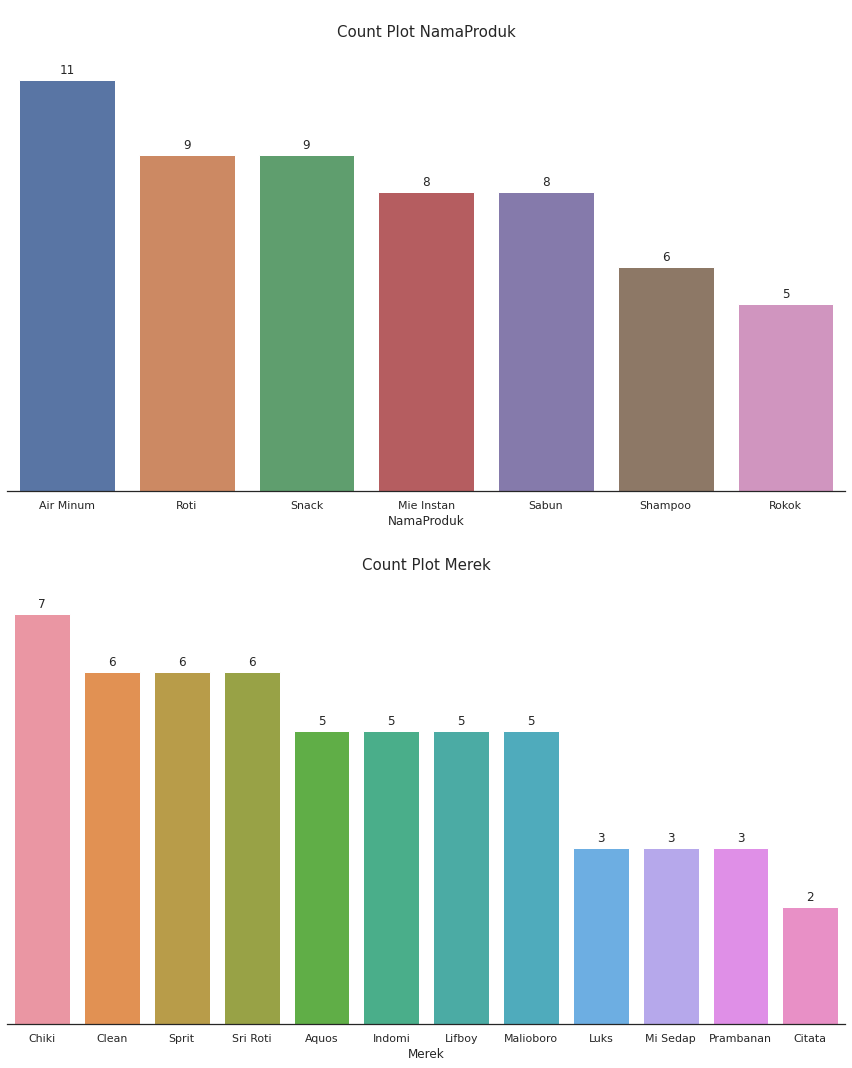

In [ ]:
sns.set(style='white')
plt.clf()

# Membuat canvas
fig, axs = plt.subplots(2,1,figsize=(12,15)) 

# Membuat plot untuk setiap kolom kategorikal  
for i, kol2 in enumerate(kolom_kategorik):  
    # Membuat Plot
    sns.countplot(df[kol2], order = df[kol2].value_counts().index, ax = axs[i])  
    axs[i].set_title('\nCount Plot %s\n'%(kol2), fontsize=15)  
      
    # Memberikan anotasi  
    for p in axs[i].patches:  
        axs[i].annotate(format(p.get_height(), '.0f'),  
                        (p.get_x() + p.get_width() / 2., p.get_height()),  
                        ha = 'center',  
                        va = 'center',  
                        xytext = (0, 10),  
                        textcoords = 'offset points') 
          
    # Setting Plot  
    sns.despine(right=True,top = True, left = True)  
    axs[i].axes.yaxis.set_visible(False) 
    plt.setp(axs)
    plt.tight_layout()

# Tampilkan plot
plt.show()

Dari visualisasi terlihat bahwa produk dengan penjualan transaksi tertinggi yakni produk air minum dengan 11 kali transaksi penjualan, 
lebih detailnya dengan merek sprit 6 kali transaksi penjualan dan merek aquos 5 kali transaksi penjualan, dengan demikian merek sprit lebih favorit dibanding merek aquos
dan untuk penjualan transaksi terendah yakni produk rokok dengan 5 kali transaksi penjualan. 

kemudian untuk penjualan snack terlihat bahwa snack dengan merek chiki lebih favorit dibanding dengan merek chitata. untuk penjualan roti dengan merek sri roti
lebih favorit dibanding dengan merek prambanan. untuk penjualan mie instan dengan merek indomi lebih favorit dengan merek mi sedap. dan untuk sabun dengan merek 
lifboy lebih favorit dibanding dengan merek luks.

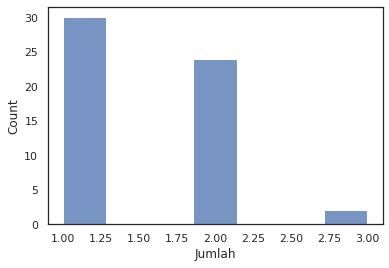

In [ ]:
sns.histplot(data=df, x='Jumlah')

Dari visualisasi terlihat bahwa jumlah penjualan setiap produk berkisar antara 1 sampai 3 buah. Hingga dapat diartikan bahwa pembeli tidak mungkin menjual kembali setiap barang belanjaannya.

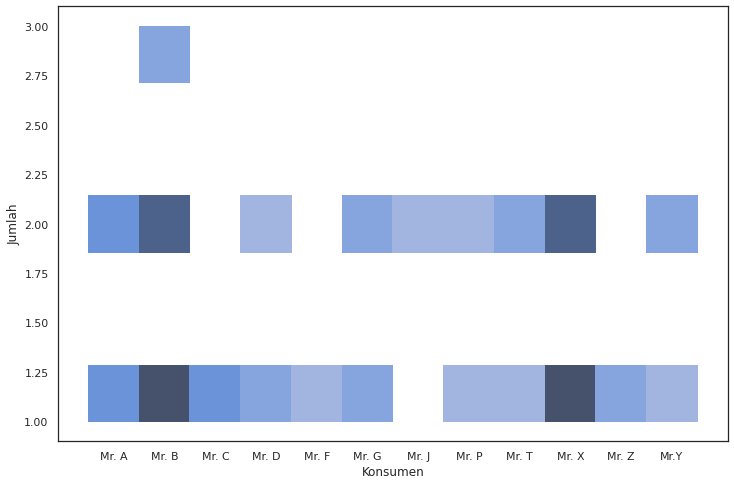

In [ ]:
fig, axs = plt.subplots(1,1,figsize=(12,8))
sns.histplot(data=df, x='Konsumen', y='Jumlah')

Terlihat bahwa konsumen Mr. B lebih sering melakukan transaksi dan melakukan pembelian terbanyak.

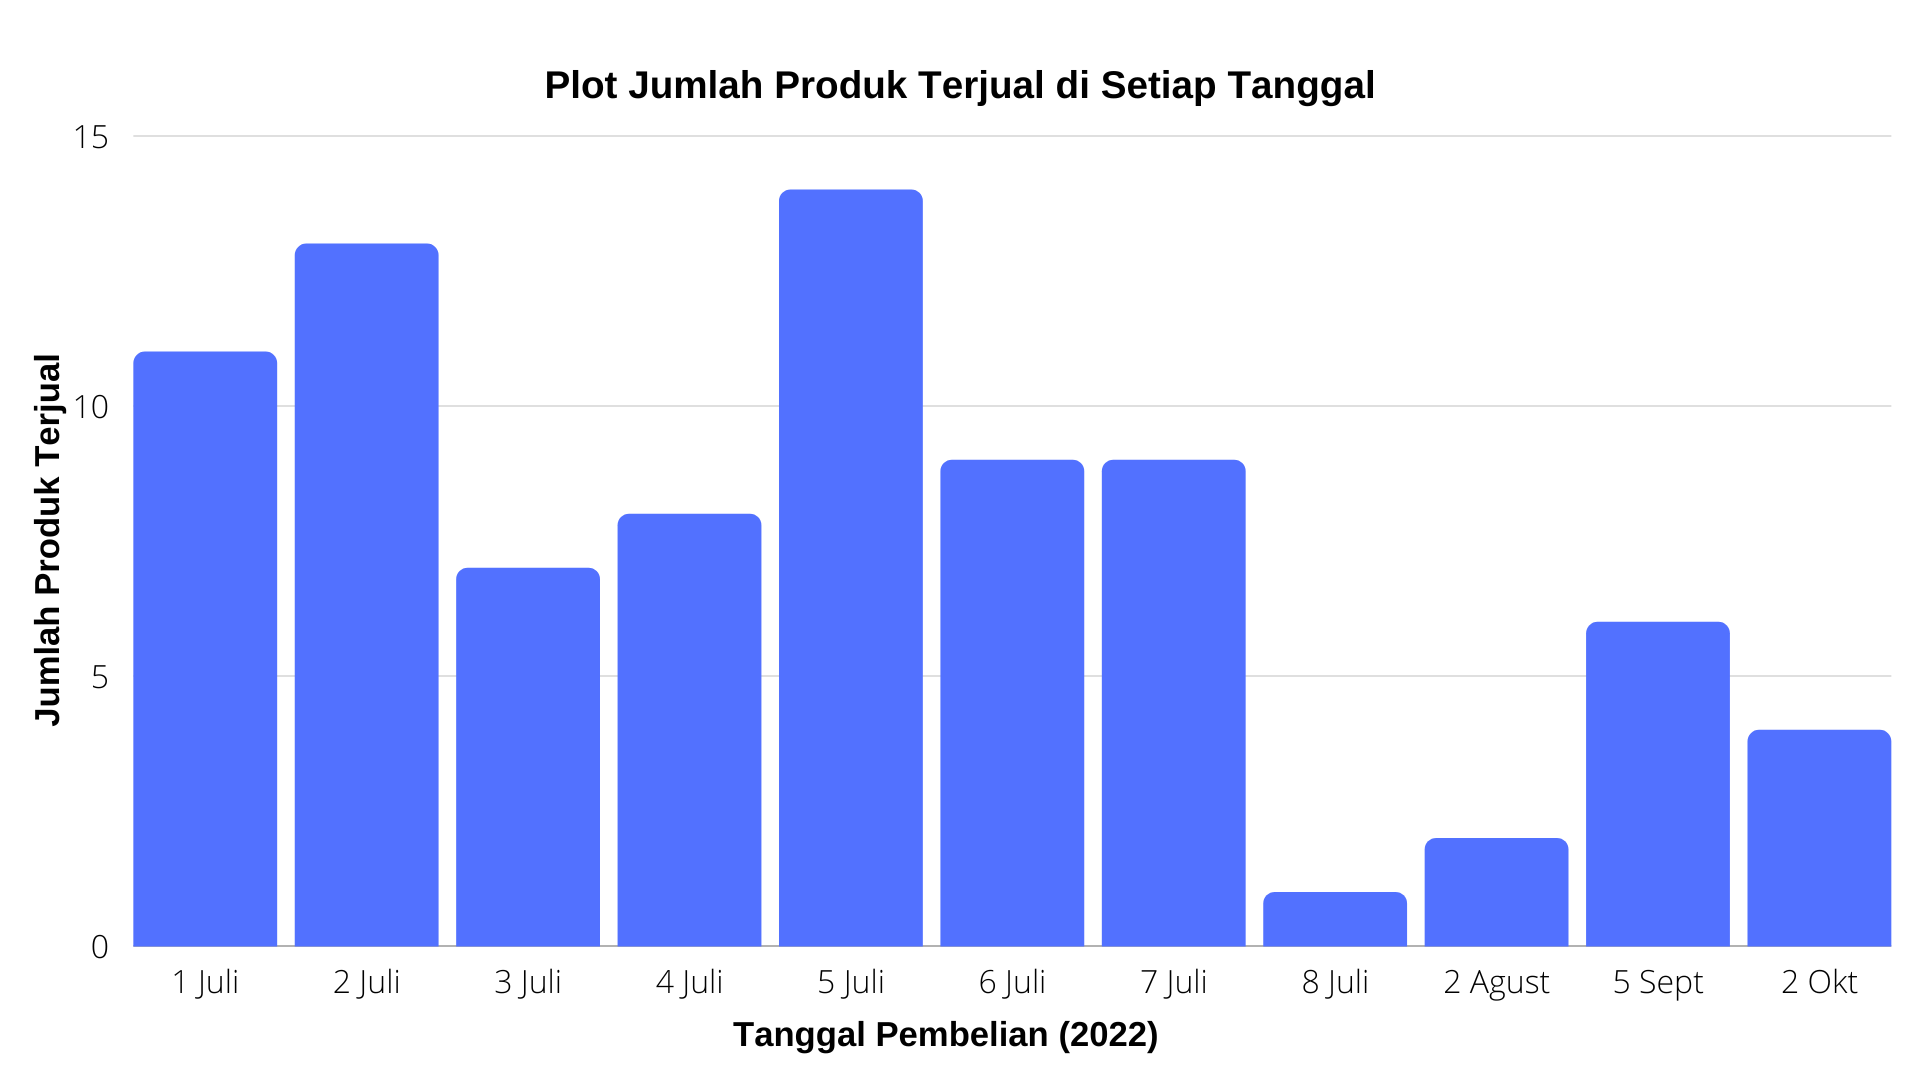

Dari plot di atas terlihat bahwa 5 teratas jumlah produk terjual didominasi oleh hari *weekday*;


*   5 Juli (Selasa) sebanyak 14 produk terjual
*   2 Juli (Sabtu) sebanyak 13 produk terjual
*   1 Juli (Jumat) sebanyak 11 produk terjual
*   6 Juli (Rabu) sebanyak 9 produk terjual
*   7 Juli (Kamis) sebanyak 9 produk terjual

Sedemikian sehingga rekomendasi yang kami berikan adalah;


*   Mempersiapkan stok yang lebih banyak ketika *weekday*.
*   Karena berlokasi di Kampus di mana target konsumennya adalah mahasiswa, toko dapat dibuka lebih pagi supaya mahasiswa yang kelas pagi bisa tertarik dan membeli di toko.







# Grouping

In [ ]:
print(set(df['Konsumen']))

{'Mr. P', 'Mr. J', 'Mr. D', 'Mr. F', 'Mr.Y', 'Mr. G', 'Mr. X', 'Mr. Z', 'Mr. C', 'Mr. T', 'Mr. A', 'Mr. B'}


In [ ]:
df_B = df[df['Konsumen'] =="Mr. B"]
df_B.head()

,IDTransaksi,Tanggal,Konsumen,IDProduk,NamaProduk,Merek,Jumlah
4,2.0,2022-07-01,Mr. B,2,Air Minum,Aquos,1
5,2.0,2022-07-01,Mr. B,6,Snack,Chiki,2
6,2.0,2022-07-01,Mr. B,3,Roti,Prambanan,1
7,2.0,2022-07-01,Mr. B,5,Shampoo,Clean,1
11,4.0,2022-07-02,Mr. B,1,Roti,Sri Roti,2


In [ ]:
# Let's sample the data
basket = df[df['Konsumen'] =="Mr. B"]
basket.head()

,IDTransaksi,Tanggal,Konsumen,IDProduk,NamaProduk,Merek,Jumlah
4,2.0,2022-07-01,Mr. B,2,Air Minum,Aquos,1
5,2.0,2022-07-01,Mr. B,6,Snack,Chiki,2
6,2.0,2022-07-01,Mr. B,3,Roti,Prambanan,1
7,2.0,2022-07-01,Mr. B,5,Shampoo,Clean,1
11,4.0,2022-07-02,Mr. B,1,Roti,Sri Roti,2


In [ ]:
basket = basket.groupby(['IDTransaksi', 'NamaProduk'])['Jumlah']

In [ ]:
basket.head()

4     1
5     2
6     1
7     1
11    2
12    2
13    3
14    1
15    2
23    1
24    1
25    1
26    3
54    2
55    2
Name: Jumlah, dtype: int64

In [ ]:
 # Jumlahkan, unstack, Null=0, index baris menggunakan Nomer Invoice
basket = basket.sum().unstack().reset_index().fillna(0).set_index('IDTransaksi')
basket.head()

NamaProduk,Air Minum,Mie Instan,Rokok,Roti,Sabun,Shampoo,Snack
IDTransaksi,,,,,,,
18.0,2,0,0,2,0,0,0
2.0,1,0,0,1,0,1,2
4.0,2,2,0,2,1,0,3
8.0,0,3,0,0,1,1,1


In [ ]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units) # one-hot encoding
basket_sets.head()

NamaProduk,Air Minum,Mie Instan,Rokok,Roti,Sabun,Shampoo,Snack
IDTransaksi,,,,,,,
18.0,1,0,0,1,0,0,0
2.0,1,0,0,1,0,1,1
4.0,1,1,0,1,1,0,1
8.0,0,1,0,0,1,1,1


# Understanding the Data Structure

In [ ]:
basket_sets.columns

Index(['Air Minum', 'Mie Instan', 'Rokok', 'Roti', 'Sabun', 'Shampoo',
       'Snack'],
      dtype='object', name='NamaProduk')

In [ ]:
basket_sets.index

Index(['18.0', '2.0', '4.0', '8.0'], dtype='object', name='IDTransaksi')

In [ ]:
basket_sets.iloc[0]

NamaProduk
Air Minum     1
Mie Instan    0
Rokok         0
Roti          1
Sabun         0
Shampoo       0
Snack         0
Name: 18.0, dtype: int64

In [ ]:
basket_sets.iloc[0].sum()

2

In [ ]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending=False, na_position='last', inplace = True)
frequent_itemsets

,support,itemsets
0,0.75,(Air Minum)
2,0.75,(Roti)
5,0.75,(Snack)
7,0.75,"(Roti, Air Minum)"
12,0.50,"(Sabun, Mie Instan)"
26,0.50,"(Roti, Snack, Air Minum)"
32,0.50,"(Sabun, Snack, Mie Instan)"
1,0.50,(Mie Instan)
20,0.50,"(Shampoo, Snack)"
19,0.50,"(Sabun, Snack)"


In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values(by='lift', ascending=False, na_position='last', inplace = True)
rules.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 115 to 38
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         200 non-null    object 
 1   consequents         200 non-null    object 
 2   antecedent support  200 non-null    float64
 3   consequent support  200 non-null    float64
 4   support             200 non-null    float64
 5   confidence          200 non-null    float64
 6   lift                200 non-null    float64
 7   leverage            200 non-null    float64
 8   conviction          200 non-null    float64
dtypes: float64(7), object(2)
memory usage: 15.6+ KB


In [ ]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
115,"(Sabun, Air Minum)","(Roti, Mie Instan)",0.25,0.25,0.25,1.0,4.0,0.1875,inf
180,"(Roti, Sabun, Snack)","(Mie Instan, Air Minum)",0.25,0.25,0.25,1.0,4.0,0.1875,inf
185,"(Roti, Snack, Mie Instan)","(Sabun, Air Minum)",0.25,0.25,0.25,1.0,4.0,0.1875,inf
184,"(Mie Instan, Snack, Air Minum)","(Roti, Sabun)",0.25,0.25,0.25,1.0,4.0,0.1875,inf
191,"(Mie Instan, Air Minum)","(Roti, Sabun, Snack)",0.25,0.25,0.25,1.0,4.0,0.1875,inf
...,...,...,...,...,...,...,...,...,...
168,(Shampoo),(Sabun),0.50,0.50,0.25,0.5,1.0,0.0000,1.0
169,(Sabun),(Shampoo),0.50,0.50,0.25,0.5,1.0,0.0000,1.0
170,(Shampoo),(Mie Instan),0.50,0.50,0.25,0.5,1.0,0.0000,1.0
171,(Mie Instan),(Shampoo),0.50,0.50,0.25,0.5,1.0,0.0000,1.0


In [ ]:
rules['confidence'].value_counts()

1.000000    89
0.500000    74
0.333333    31
0.666667     6
Name: confidence, dtype: int64

In [ ]:
rules['support'].value_counts()

0.25    180
0.50     18
0.75      2
Name: support, dtype: int64

In [ ]:
support1= rules[rules['support'] ==0.75]
support2= rules[rules['support'] ==0.50]
support3= rules[rules['support'] ==0.25]

In [ ]:
support1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Roti),(Air Minum),0.75,0.75,0.75,1.0,1.333333,0.1875,inf
1,(Air Minum),(Roti),0.75,0.75,0.75,1.0,1.333333,0.1875,inf


Dari hasil output diatas didapatkan bahwa terdapat kecenderungan yang besar jika mahasiswa membeli roti maka memiliki peluang besar untuk memberi air minum, begitupun sebaliknya. maka kami merekomendasikan untuk 

1.   Menaruh Roti dan Air Minum **Bersebelahan** agar mahasiswa dapat cepat mendapatkan barang yang diinginkan
2.   Dapat memberikan **Promo** Air Mineral setiap pembelian Roti 



In [ ]:
support2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
13,(Mie Instan),"(Sabun, Snack)",0.50,0.50,0.5,1.000000,2.000000,0.250,inf
11,(Sabun),"(Snack, Mie Instan)",0.50,0.50,0.5,1.000000,2.000000,0.250,inf
10,"(Snack, Mie Instan)",(Sabun),0.50,0.50,0.5,1.000000,2.000000,0.250,inf
8,"(Sabun, Snack)",(Mie Instan),0.50,0.50,0.5,1.000000,2.000000,0.250,inf
3,(Mie Instan),(Sabun),0.50,0.50,0.5,1.000000,2.000000,0.250,inf
2,(Sabun),(Mie Instan),0.50,0.50,0.5,1.000000,2.000000,0.250,inf
19,(Mie Instan),(Snack),0.50,0.75,0.5,1.000000,1.333333,0.125,inf
18,(Snack),(Mie Instan),0.75,0.50,0.5,0.666667,1.333333,0.125,1.5
17,(Snack),(Sabun),0.75,0.50,0.5,0.666667,1.333333,0.125,1.5
16,(Sabun),(Snack),0.50,0.75,0.5,1.000000,1.333333,0.125,inf


Dari hasil output yang dihasilkan diatas terlihat bahwa terdapat kecenderungan untuk pola siklus dalam pembelian barang

1. Jika mahasiswa membeli mie instan maka kemungkinan akan membeli sabun dan snack
2. Jika mahasiswa membeli sabun maka kemungkinan akan membeli snack dan mie instan
3. Jika mahasiswa membeli snack dan mie instan maka kecenderungan akan membeli sabun
4. Jika mahasiswa membeli sabun dan snack maka ada kecenderungan akan membeli mie instan

maka kami merekomendasikan untuk **menata secara berjauhan** agar mahasiswa dapat melihat lihat produk lainnya




In [ ]:
support3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
115,"(Sabun, Air Minum)","(Roti, Mie Instan)",0.25,0.25,0.25,1.0,4.0,0.1875,inf
180,"(Roti, Sabun, Snack)","(Mie Instan, Air Minum)",0.25,0.25,0.25,1.0,4.0,0.1875,inf
185,"(Roti, Snack, Mie Instan)","(Sabun, Air Minum)",0.25,0.25,0.25,1.0,4.0,0.1875,inf
184,"(Mie Instan, Snack, Air Minum)","(Roti, Sabun)",0.25,0.25,0.25,1.0,4.0,0.1875,inf
191,"(Mie Instan, Air Minum)","(Roti, Sabun, Snack)",0.25,0.25,0.25,1.0,4.0,0.1875,inf
...,...,...,...,...,...,...,...,...,...
168,(Shampoo),(Sabun),0.50,0.50,0.25,0.5,1.0,0.0000,1.0
169,(Sabun),(Shampoo),0.50,0.50,0.25,0.5,1.0,0.0000,1.0
170,(Shampoo),(Mie Instan),0.50,0.50,0.25,0.5,1.0,0.0000,1.0
171,(Mie Instan),(Shampoo),0.50,0.50,0.25,0.5,1.0,0.0000,1.0


Dari hasil output yang dihasilkan terdapat kecenderungan yang kecil untuk barang barang ini muncul bersamaan. barang barang yang kami maksud antara lain:
1. Jika mahasiswa membeli sabun dan air minum maka akan cenderung membeli roti dan mie instan
2. Jika mahasiswa membeli Roti, Sabun dan Snack maka akan cenderung membeli Mie instan dan Air Minum
3. Jika mahasiswa membeli Roti, Snack dan Mie instan maka akan cenderung membeli Sabun dan Air Minum
4. Jika mahasiswa membeli Mie instan, Snack dan Air Minum maka akan cenderung membeli Roti dan Sabun
5. Jika mahasiswa membeli Mie instan dan Air Minum maka akan cenderung membeli Roti, Sabun dan Snack

maka kami merekomendasikan untuk fokus mengiklankan agar barang yang memiliki peluang kecil untuk muncul bersamaan bisa dapat ter ekspos dengan lebih sedemikian sehingga mahasiswa dapat mengetahui dan menarik minat melalui iklan yang ada,

#Kesimpulan#


Kesimpulan yang dapat diambil dari analisis kami;
1. Pola pembelian AlfaIndo Cabang UIN Ciputat yang paling banyak dihasilkan adalah *Roti dan Air Minum*.

2. Item yang paling sering dibeli oleh pembeli adalag air minum, sehingga persediaan stok barang untuk item tersebut diperbanyak dibanding item lainnya.

3. Untuk pola dengan tingkat kepercayaan (*confidence*) tinggi, dijadikan sarana paket promo untuk dua item yang muncul bersamaan. Misalnya, untuk pola *Roti dan Air Minum*. Untuk setiap pembelian **Roti** mendapatkan promo air mineral.

# Penutup

Akhir kata, kami memohon maaf dari semua insight yang kami berikan kepada perusahaan AlfaIndo Cabang UIN Ciputat, kami belum bisa memastikan hal tersebut adalah yang terbaik.

Diluar dari data yang disajikan pastilah ada variabel lain yang menunjang data-data yang lain menjadi menarik.

Oleh karena itu, insight yang telah kami berikan belum sepenuhnya dapat menjelaskan secara menyeluruh.